<div style="line-height:0.5">
<h1 style="color:#9865A9"> Curve Fitting examples 1 </h1>
</div>
<div style="line-height:1.5">
<div style="margin-top: -10px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> PCA + numpy abs() + numpy linspace + matplotlib rcParams[ ]
</span>
</div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

<div style="line-height:0.4">
<h2 style="color:#9865A9"> Interpolation </h2>
</div>

**Recap:** <br>
Interpolation is the process of finding a function that approximates a set of data points. <br>
The purpose of interpolation is to determine the best possible parameters for a model function that can approximate the given set of data points. <br>
The model function depends on unknown parameters, and the goal is to find the optimal set of parameters that will make the model function closely resemble the data.

In machine learning, interpolation refers to the process of estimating the value of a function within the range of the given data points. <br>
It is used to fit a model to the given data points and then use the model to make predictions for new data.   
Regression and classification methods can be seen as a form of interpolation even when the number of dimensions is high, <br> 
to learn a function that maps input data to output data. 

In [2]:
x_data = np.random.uniform(low=0.0, high=1.0, size=20)
y_data = 2*x_data + np.random.normal(scale=0.1, size=20)
x_data, y_data

(array([0.66471557, 0.63476537, 0.51362448, 0.31126513, 0.17580185,
        0.22818257, 0.16824105, 0.89045353, 0.99579203, 0.50494041,
        0.38081266, 0.82897011, 0.47709549, 0.48926187, 0.75494057,
        0.72538485, 0.18798932, 0.81684346, 0.88478635, 0.09248019]),
 array([1.32819327, 1.27341676, 1.18826053, 0.56444886, 0.41887074,
        0.26587132, 0.21814686, 1.64852617, 2.01537324, 1.1699817 ,
        0.8676097 , 1.72434375, 0.88139725, 0.87252678, 1.50500005,
        1.20246242, 0.37989179, 1.82196695, 1.7864368 , 0.31527993]))

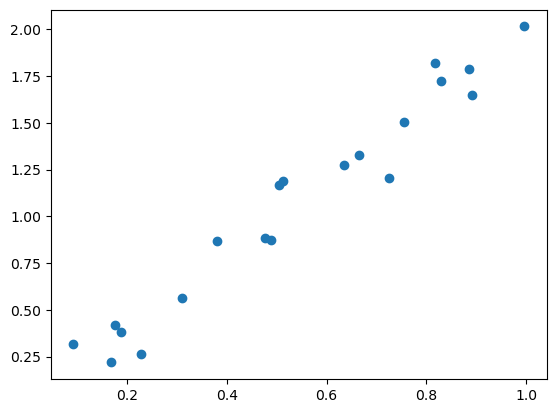

In [3]:
## scatter requires 2 arrays
plt.scatter(x_data, y_data)
plt.show()

In [4]:
x_data2 = np.array([0.        , 0.15789474, 0.31578947, 0.47368421, 0.63157895,
                0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
                1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
                2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.        ])
y_data2 = np.array([  2.95258285,   2.49719803,  -2.1984975 ,  -4.88744346,
                -7.41326345,  -8.44574157, -10.01878504, -13.83743553,
                -12.91548145, -15.41149046, -14.93516299, -13.42514157,
                -14.12110495, -17.6412464 , -16.1275509 , -16.11533771,
                -15.66076021, -13.48938865, -11.33918701, -11.70467566])

## Generate 10 random numbers with mean 0 and standard deviation 0.5
random_offset_x = np.random.normal(loc=0.0, scale=0.5, size=10)
random_offset_y = np.random.normal(loc=0.0, scale=0.5, size=10)

## Add the random offset to the x and y data arrays
x_data2 = np.concatenate([x_data2, random_offset_x])
y_data2 = np.concatenate([y_data2, random_offset_y])

x_data2, y_data2

(array([ 0.        ,  0.15789474,  0.31578947,  0.47368421,  0.63157895,
         0.78947368,  0.94736842,  1.10526316,  1.26315789,  1.42105263,
         1.57894737,  1.73684211,  1.89473684,  2.05263158,  2.21052632,
         2.36842105,  2.52631579,  2.68421053,  2.84210526,  3.        ,
         0.03946493, -0.35651348,  0.28250518, -0.35361974, -0.49102801,
         0.50458413,  0.54036241,  0.34366247, -0.36395289,  0.09266404]),
 array([  2.95258285,   2.49719803,  -2.1984975 ,  -4.88744346,
         -7.41326345,  -8.44574157, -10.01878504, -13.83743553,
        -12.91548145, -15.41149046, -14.93516299, -13.42514157,
        -14.12110495, -17.6412464 , -16.1275509 , -16.11533771,
        -15.66076021, -13.48938865, -11.33918701, -11.70467566,
          0.99426055,   0.14600569,  -1.15455317,   0.04315495,
         -0.03455975,   0.39299738,   0.27160705,  -0.1937608 ,
         -0.70164679,  -0.23339322]))

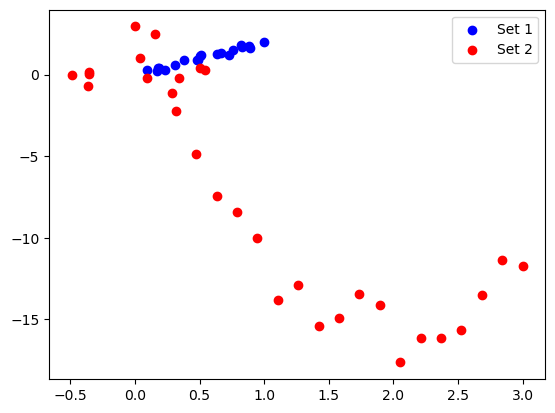

In [5]:
plt.scatter(x_data, y_data, c='blue', label='Set 1')
plt.scatter(x_data2, y_data2, c='red', label='Set 2')
plt.legend()
plt.show()

A choice for a simple appropriate quadratic model as starting point! To find the weights a, b, and c of the model 
The choice of model is not unique and depends on the nature of the data and the specific problem being solved. 
--> linear + complex models

In [6]:
""" 0 first hypothesis = quadratic model """
def model_f(x, a, b, c):
    return a*(x-b)**2 + c

<div style="line-height:0.4">
<h4 style="color:#9865A9"> Curve_fit </h4>
</div>

The scipy's curve_fit function finds the optimal parameters for the quadratic model that best fit the data, 
using a non-linear least squares optimization algorithm to minimize the sum of the squared differences 
between the predicted values of the model and the actual data points. 

The resulting parameters represent the most likely configuration that will produce a model function 
that closely approximates the given data.

In [7]:
""" N.B randomly a RuntimeError occurs! 
RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Can be solved by running again the code or changing the initial params or increasing the num of allowable iterations
(handled as **kwargs parameters by curve_fit)

- p0 are the initial guess parameters
"""

popt, pcov = curve_fit(model_f, x_data, y_data, p0=[3,2,-16], maxfev=50000) 

popt2, pcov2 = curve_fit(model_f, x_data2, y_data2, p0=[3,2,-16], maxfev=10000)


In [8]:
# Get the optimal parameters for the model_f given the data
popt

array([-2.55799828e-03,  3.92821375e+02,  3.94716735e+02])

In [9]:
# Covariance matrix to describe the uncertainty in the estimated parameters
pcov

array([[1.98266649e-01, 3.03948661e+04, 3.05006385e+04],
       [3.03948661e+04, 4.65962365e+09, 4.67583929e+09],
       [3.05006385e+04, 4.67583929e+09, 4.69211178e+09]])

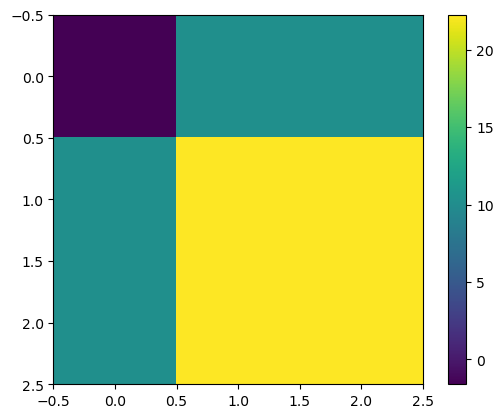

In [10]:
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

[  1.89687211   2.73106518 -14.84281401]


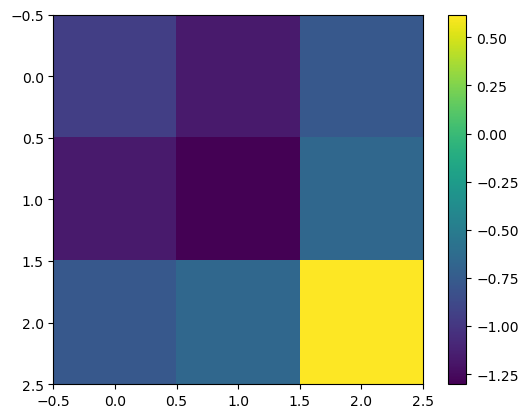

In [11]:
## Covariance matrix for set2
print(popt2)
plt.imshow(np.log(np.abs(pcov2)))
plt.colorbar()
plt.show()

In [12]:
""" Approximation set #1 """

# Get optimal parameters found by the curve_fit function when fitting the model function model_f to the data
a_opt, b_opt, c_opt = popt
# Generate 100 equally spaced points between the minimum and maximum values of x_data
x_model = np.linspace(min(x_data), max(x_data), 100) 
# Evaluate the model function model_f at each of the x-values in x_model using the optimal parameters. 
# The y-values represent the predicted values of the model at each point in x_model. 
y_model = model_f(x_model, a_opt, b_opt, c_opt)

x_model, y_model

(array([0.09248019, 0.10160455, 0.11072891, 0.11985327, 0.12897763,
        0.138102  , 0.14722636, 0.15635072, 0.16547508, 0.17459944,
        0.18372381, 0.19284817, 0.20197253, 0.21109689, 0.22022125,
        0.22934562, 0.23846998, 0.24759434, 0.2567187 , 0.26584306,
        0.27496743, 0.28409179, 0.29321615, 0.30234051, 0.31146488,
        0.32058924, 0.3297136 , 0.33883796, 0.34796232, 0.35708669,
        0.36621105, 0.37533541, 0.38445977, 0.39358413, 0.4027085 ,
        0.41183286, 0.42095722, 0.43008158, 0.43920594, 0.44833031,
        0.45745467, 0.46657903, 0.47570339, 0.48482775, 0.49395212,
        0.50307648, 0.51220084, 0.5213252 , 0.53044956, 0.53957393,
        0.54869829, 0.55782265, 0.56694701, 0.57607137, 0.58519574,
        0.5943201 , 0.60344446, 0.61256882, 0.62169318, 0.63081755,
        0.63994191, 0.64906627, 0.65819063, 0.66731499, 0.67643936,
        0.68556372, 0.69468808, 0.70381244, 0.7129368 , 0.72206117,
        0.73118553, 0.74030989, 0.74943425, 0.75

In [13]:
""" Approximation set #2 """

# Get optimal parameters 
a_opt2, b_opt2, c_opt2 = popt2
# Generate points
x_model2 = np.linspace(min(x_data2), max(x_data2), 100) 
# Evaluate the model
y_model2 = model_f(x_model2, a_opt2, b_opt2, c_opt2)

x_model2, y_model2

(array([-4.91028011e-01, -4.55765101e-01, -4.20502192e-01, -3.85239283e-01,
        -3.49976374e-01, -3.14713465e-01, -2.79450555e-01, -2.44187646e-01,
        -2.08924737e-01, -1.73661828e-01, -1.38398919e-01, -1.03136009e-01,
        -6.78731002e-02, -3.26101910e-02,  2.65271818e-03,  3.79156274e-02,
         7.31785366e-02,  1.08441446e-01,  1.43704355e-01,  1.78967264e-01,
         2.14230173e-01,  2.49493083e-01,  2.84755992e-01,  3.20018901e-01,
         3.55281810e-01,  3.90544719e-01,  4.25807629e-01,  4.61070538e-01,
         4.96333447e-01,  5.31596356e-01,  5.66859265e-01,  6.02122175e-01,
         6.37385084e-01,  6.72647993e-01,  7.07910902e-01,  7.43173811e-01,
         7.78436721e-01,  8.13699630e-01,  8.48962539e-01,  8.84225448e-01,
         9.19488357e-01,  9.54751267e-01,  9.90014176e-01,  1.02527708e+00,
         1.06053999e+00,  1.09580290e+00,  1.13106581e+00,  1.16632872e+00,
         1.20159163e+00,  1.23685454e+00,  1.27211745e+00,  1.30738036e+00,
         1.3

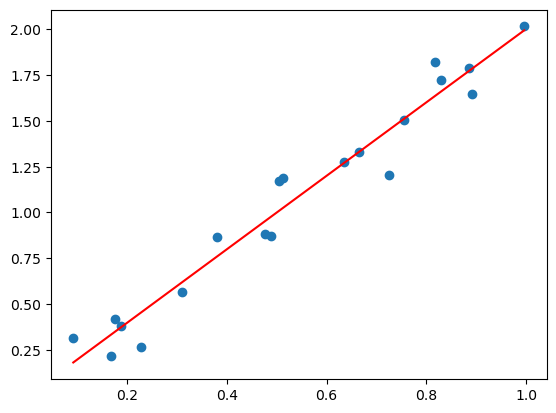

In [14]:
plt.scatter(x_data,y_data)
plt.plot(x_model, y_model, color='r')
plt.show()

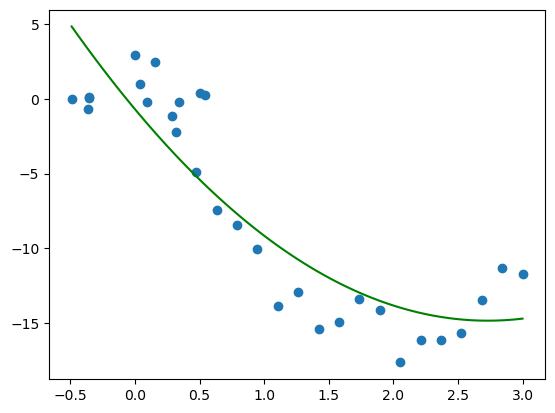

In [15]:
""" Example of bad result in the approximation!! underfitted! """
plt.scatter(x_data2,y_data2)
plt.plot(x_model2, y_model2, color='g')
plt.show()

<h2 style="color:#9865A9"> <u> Try various models to find the best fit </u> </h2>

### => 1) Linear model (too poor, clearly)

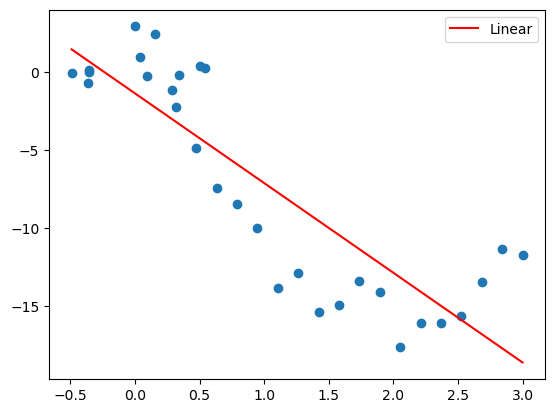

In [16]:
def linear_f(x, m, b):
    return m*x + b
# Fit
popt, pcov = curve_fit(linear_f, x_data2, y_data2)
### 
m_opt, b_opt = popt
x_model = np.linspace(min(x_data2), max(x_data2), 100)
y_model = linear_f(x_model, m_opt, b_opt)

plt.scatter(x_data2, y_data2)
plt.plot(x_model, y_model, label='Linear', color='r')
plt.legend()
plt.show()

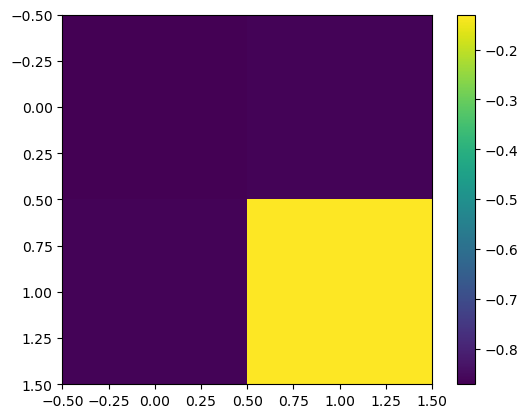

In [17]:
""" Covariance matrix #1 """
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

### => 2) Exponential (underfit)

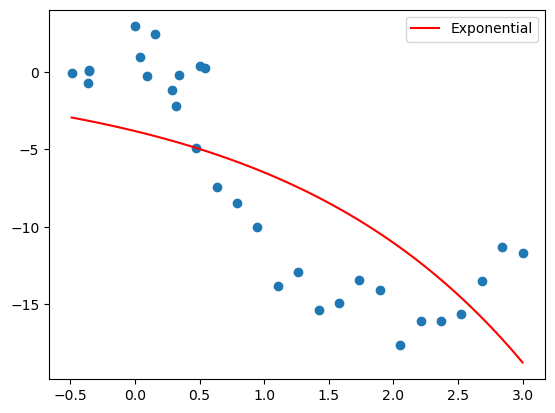

In [18]:
def exponential_f(x, a, b):
    return a * np.exp(b * x)

popt, pcov = curve_fit(exponential_f, x_data2, y_data2)
a_opt, b_opt = popt
x_model = np.linspace(min(x_data2), max(x_data2), 100)
y_model = exponential_f(x_model, a_opt, b_opt)

plt.scatter(x_data2, y_data2)
plt.plot(x_model, y_model, label='Exponential', color='r')
plt.legend()
plt.show()

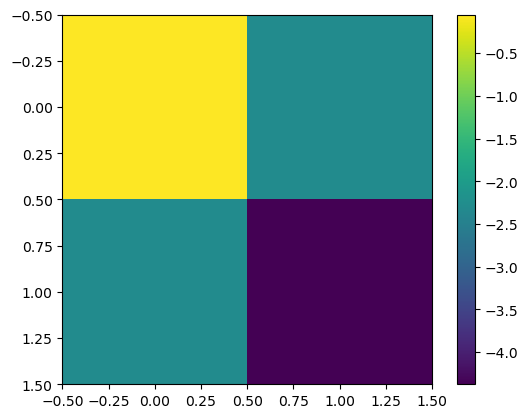

In [19]:
""" Covariance matrix #2 """
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

### => 3) Sigmoid (completely wrong! Not suitable)

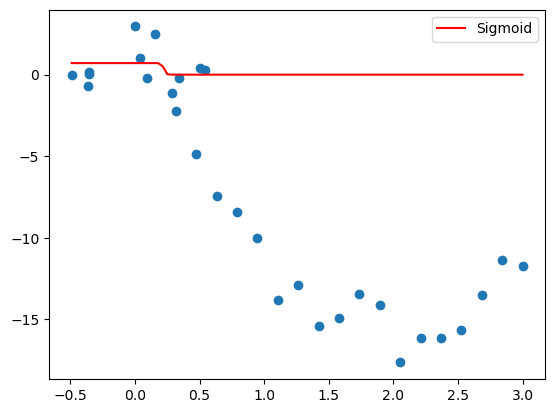

In [20]:
def sigmoid_f(x, a, b, c):
    return a / (1 + np.exp(-b*x + c))

popt, pcov = curve_fit(sigmoid_f, x_data2, y_data2, maxfev = 100800)
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data2), max(x_data2), 100)
y_model = sigmoid_f(x_model, a_opt, b_opt, c_opt)

plt.scatter(x_data2 ,y_data2)
plt.plot(x_model, y_model, label='Sigmoid', color='r')
plt.legend()
plt.show()

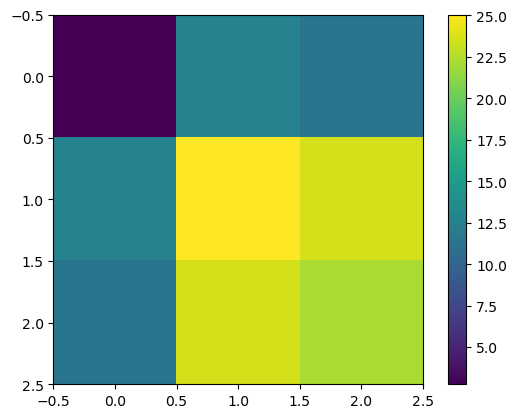

In [21]:
""" Covariance matrix #3 """
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

### => 4) Power law function (nonlinear relationship) 

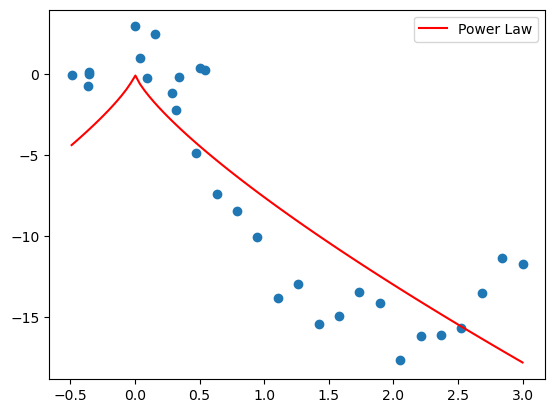

In [22]:
""" 
N.B.
To avoid the RuntimeWarning: invalid value encountered in power return a * x**b
(that occurs when x or b is negative and b is not an integer).
    1) Add:
        x = np.maximum(x, 0)
        b = np.maximum(b, 0)
            to set any negative values to zero
    
    2) Add:
        x = np.abs(x)
            - to take the absolute val of x 
        b = np.exp(b)
            - to transform b ensuring that it is always positive
"""
def power_law_f(x, a, b):
    """ Compulate the value of a power-law function at given points.\\
    The power-law function is defined as: f(x) = a * |x|^b
    """ 
    x = np.abs(x)
    b = np.exp(b)
    return a * x**b

popt, pcov = curve_fit(power_law_f, x_data2, y_data2)
a_opt, b_opt = popt
x_model = np.linspace(min(x_data2), max(x_data2), 100)
y_model = power_law_f(x_model, a_opt, b_opt)

plt.scatter(x_data2, y_data2)
plt.plot(x_model, y_model, label='Power Law', color='r')
plt.legend()

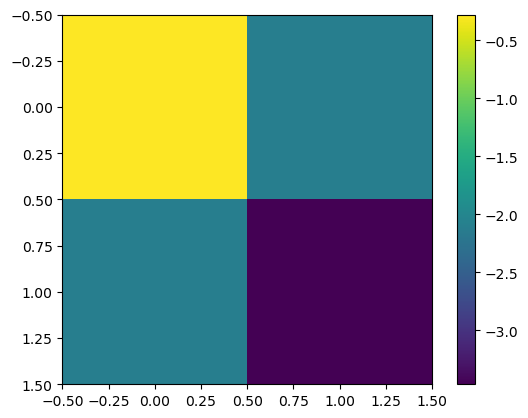

In [23]:
""" Covariance matrix #4 """
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

### => 5) A polynomial model of degree 2 with an additional sinusoidal term. <br> Increase the number of features

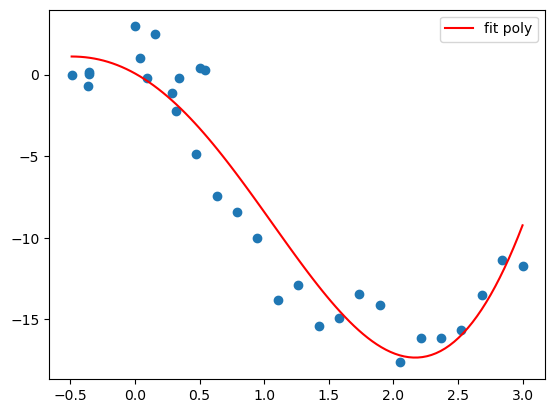

In [24]:
def fit_poly(x, a, b, c, d):
    return a*(x-b)**2 + c + d*0.0001*np.cos(x)

# Fit
    # p0 : Initial guess for the parameters (length N). If None, then the initial values will all be 1 
    # maxfev : max numb of calls to the function
popt, pcov = curve_fit(fit_poly, x_data2, y_data2, p0=[1,2,-16,1], maxfev = 125000) 

a_opt, b_opt, c_opt, d_opt = popt
x_model = np.linspace(min(x_data2), max(x_data2), 100)
y_model = fit_poly(x_model, a_opt, b_opt, c_opt, d_opt)

### Plot
plt.scatter(x_data2, y_data2)
plt.plot(x_model, y_model, label='fit poly', color='r')
plt.legend()
plt.show()

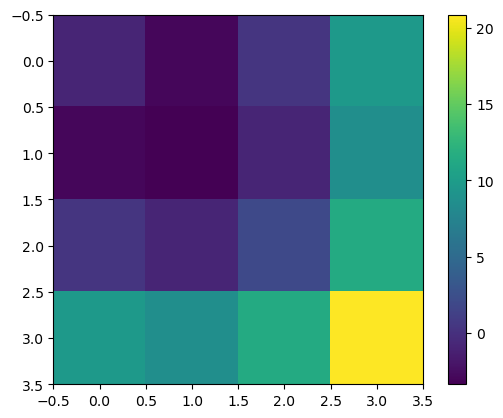

In [25]:
""" Covariance matrix #5 """
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

<div style="line-height:0.5">
<h3> => 6) Do some improvements to last model (5) but using a higher-order polynomial </h3>
</div>

Increase params and points and num of iterations

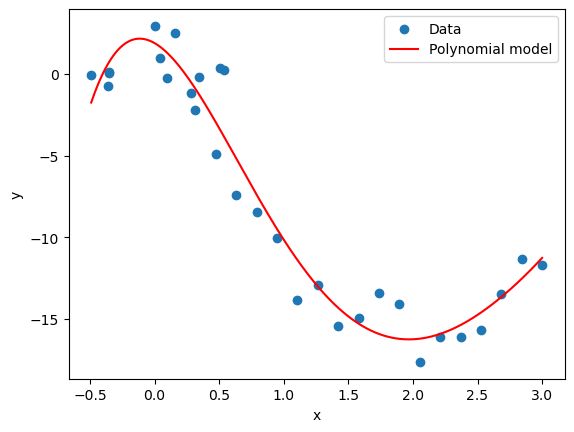

In [26]:
# Define a higher-order polynomial model
def fit_poly(x, a, b, c, d, e, f):
    return a*(x-b)**5 + c*(x-d)**4 + e*(x-f)**3

# Fit the model to the data
popt, pcov = curve_fit(fit_poly, x_data2, y_data2, p0=[1,1,-1,1,-1,1], maxfev=125000)

# Extract the optimal parameter values
a_opt, b_opt, c_opt, d_opt, e_opt, f_opt = popt

# Generate a smooth curve using the optimal parameter values
x_model = np.linspace(min(x_data2), max(x_data2), 1000)
y_model = fit_poly(x_model, a_opt, b_opt, c_opt, d_opt, e_opt, f_opt)

# Plot the data and the model
fig, ax = plt.subplots()
ax.scatter(x_data2, y_data2, label='Data')
ax.plot(x_model, y_model, label='Polynomial model', color='r')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

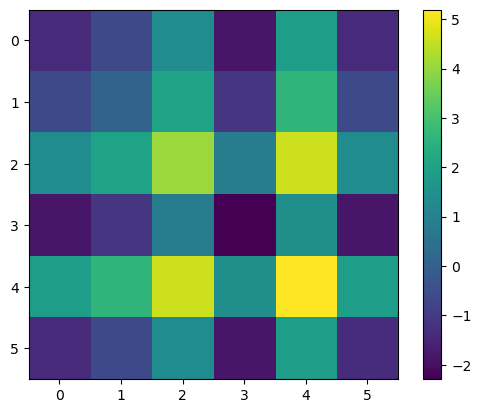

In [27]:
""" Covariance matrix #6 """
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

<h3> => 7) Another higher-order polynomial model </h3>

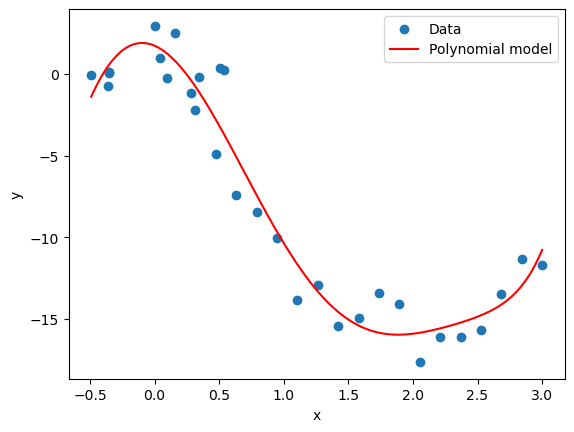

In [28]:
def fit_poly(x, a, b, c, d, e, f, g):
    """ Fit a polynomial function of the form:\\
    a*(x-b)**7 + c*(x-d)**6 + e*(x-f)**5 + g*(x-1)**4
    """
    return a*(x-b)**7 + c*(x-d)**6 + e*(x-f)**5 + g*(x-1)**4

# Fit 
popt, pcov = curve_fit(fit_poly, x_data2, y_data2, p0=[1, 1, -1, 1, -1, 1, 1], maxfev=125000)
# Extract optimal parameter values
a_opt, b_opt, c_opt, d_opt, e_opt, f_opt, g_opt = popt
## Generate the curves 
x_model = np.linspace(min(x_data2), max(x_data2), 1000)
y_model = fit_poly(x_model, a_opt, b_opt, c_opt, d_opt, e_opt, f_opt, g_opt)

####### Plot the data and the model
fig, ax = plt.subplots()
ax.scatter(x_data2, y_data2, label='Data')
ax.plot(x_model, y_model, label='Polynomial model', color='r')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

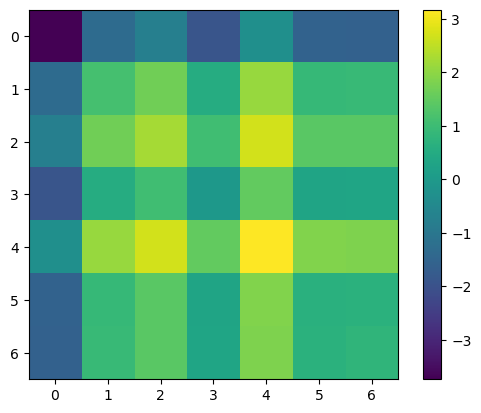

In [29]:
""" Covariance matrix #7 """
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

<div style="line-height:0.4">
<h2 style="color:#9865A9"> <u>Metrics:</u> </h2>
</div>

To evaluate the quality of a fit obtained using curve_fit.   
Curve_fit is not a ML algorithm, metrics such as precision, recall, or F1-score, are useless.   
But we can still find metrics that rely on visual inspection of the fit and the metrics mentioned above to evaluate the quality of the fit.  

In [30]:
""" r2 squared score """
y_model = fit_poly(x_data2, a_opt, b_opt, c_opt, d_opt, e_opt, f_opt, g_opt)
r2 = r2_score(y_data2, y_model)

In [31]:
""" mean squared error """
mse = mean_squared_error(y_data2, y_model)

In [32]:
""" Residual sum of squares. 
Sum of the squared differences between the predicted values and the actual values. 
Lower RSS ==> better fit.
"""
rss = np.sum((y_data2 - y_model)**2)

In [33]:
""" Root mean squared error.
Square root of the average of the squared differences between the predicted values and the actual values. 
Lower RMSE ==> better fit. 
"""
rmse = np.sqrt(np.mean((y_data2 - y_model)**2))

In [34]:
""" Mean absolute error.
The average of the absolute differences between the predicted values and the actual values. 
Lower MAE ==> better fit.
"""
mae = np.mean(np.abs(y_data2 - y_model))

In [35]:
""" Coefficient of determination (adjusted R-squared) 
A modified version of R-squared that takes into account the number of parameters in the model. 
It is a measure of the proportion of the variance in the dependent variable that is explained \
by the independent variable(s) or the model, adjusted for "k" the number of parameters in the model.  
Higher adj_r2 ==> better fit. (ranges from 0 to 1) 
"""
n = len(y_data2)
k = 7   
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [36]:
print('R-squared:', r2)
print('Mean squared error:', mse)
print('Residual_sum_squares:', rss)
print('Root mean squared error:', rmse)
print('Mean absolute error:', mae)
print('Adjusted R-squared:', adj_r2)

R-squared: 0.9463762294194229
Mean squared error: 2.608189444552311
Residual_sum_squares: 78.24568333656933
Root mean squared error: 1.6149889920839433
Mean absolute error: 1.346935772793997
Adjusted R-squared: 0.9293141205983302


<h2 style="color:#9865A9"> <u>Gaussian models:</u> </h2>

In [37]:
## Generate samples
x = np.linspace(700, 900, 201)
y = 1000 * np.exp(-(x - 800)**2 / (2 * 10**2)) + np.random.normal(scale=10, size=201)

df = pd.DataFrame({'Channel': x, 'Cs137': y})
# Save df
df.to_csv('./datasets_used/curve_gauss_data.csv', index=False)

In [38]:
df = pd.read_csv('./datasets_used/curve_gauss_data.csv')
x_points = df.Channel
y_points = df.Cs137

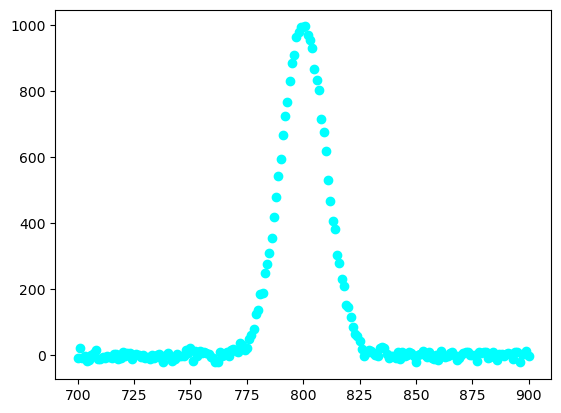

In [39]:
plt.scatter(x_points, y_points, color='cyan')
plt.show()

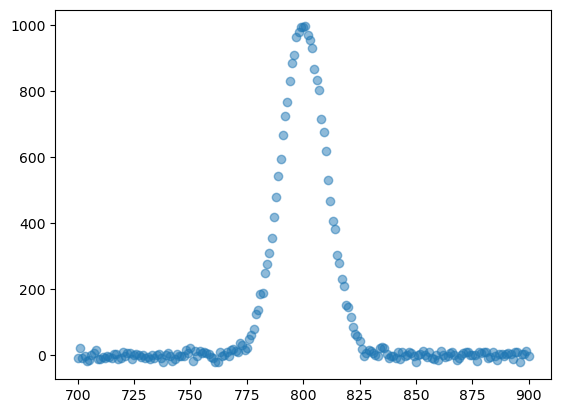

In [40]:
plt.plot(df['Channel'], df['Cs137'], 'o', alpha=0.5)
plt.show()

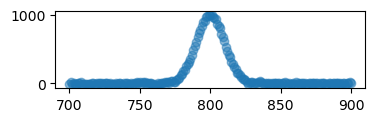

In [41]:
# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X = pca.fit_transform(df)

# Plot the reduced data
#plt.plot(X[:,0], X[:,1], 'o', alpha=0.5)
# To specify sizes:
fig, ax = plt.subplots(figsize=(4, 1))
ax.plot(df['Channel'], df['Cs137'], 'o', alpha=0.5)
plt.show()

In [42]:
def gauss_f(x, A, mu, sig):
    """ Calculate the value of a Gaussian (normal) distribution function at given points.
    
    Parameters:
        - Input values at which to evaluate the Gaussian function [(float or ndarry]
        - Amplitude (peak value) of the Gaussian [(float]
        - Mean (center) of the Gaussian [(float]
        - Standard deviation (spread) of the Gaussian [(float]
    """
    return A * np.exp(-(x - mu)**2/sig**2)

In [43]:
x_data = x_points[(x_points>725) & (x_points<850)]
y_data = y_points[(x_points>725) & (x_points<850)]

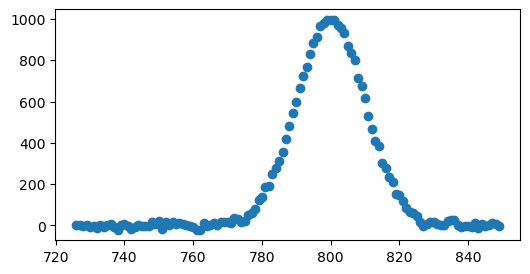

In [44]:
# Set the default figure size from now on 
plt.rcParams['figure.figsize'] = [6, 3]

plt.scatter(x_data, y_data)
plt.show()

In [45]:
popt, pcov = curve_fit(gauss_f, x_data, y_data, p0=[2000, 790, 60])
popt

array([998.77224403, 800.01699355,  14.05780562])

In [46]:
### Get parameters and create the model
A_opt, mu_opt, sig_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 1000)
y_model = gauss_f(x_model, A_opt, mu_opt, sig_opt)

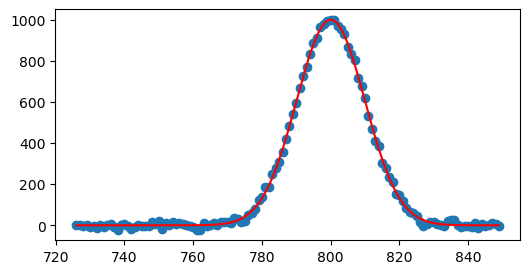

In [47]:
## Display the model aproximation
plt.scatter(x_data, y_data)
plt.plot(x_model, y_model, color='r')
plt.show()

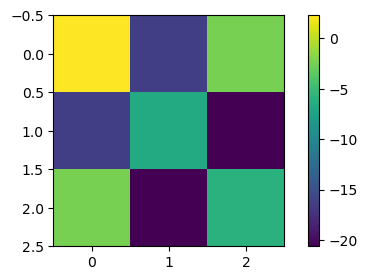

In [48]:
""" Covariance matrix """
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

In [49]:
""" Calculate the standard errors (the precision of the estimates) of the fitted parameters, 
taking the square root of variances of the estimated parameters. 
It corresponds to the elements on the diagonal of the covariance matrix.
"""
np.sqrt(np.diag(pcov))

array([3.14717466, 0.0361682 , 0.05114957])

<div style="line-height:0.4">
<h2 style="color:#9865A9"><u>Another example: </u></h2>
</div>


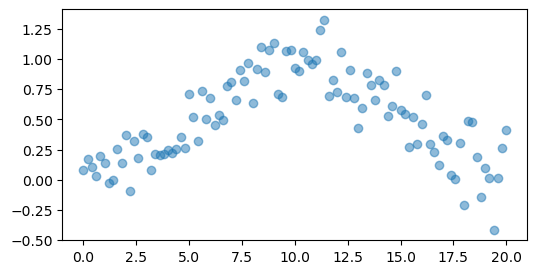

In [50]:
x = np.linspace(0, 20, 101)
y = np.exp(-(x - 10)**2 / (2 * 4**2)) + np.random.normal(scale=0.2, size=101)

df = pd.DataFrame({'X': x, 'Y': y})

plt.plot(df['X'], df['Y'], 'o', alpha=0.5)
plt.show()

In [51]:
x

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. ])

In [52]:
def gauss_f(x, A, mu, sig):
    return A*np.exp(-(x-mu)**2/sig**2)

x_data = x[(x>10) & (x<20)]
y_data = y[(x>10) & (x<20)]

x_data, y_data

(array([10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2,
        12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4,
        14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6,
        16.8, 17. , 17.2, 17.4, 17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8,
        19. , 19.2, 19.4, 19.6, 19.8]),
 array([ 0.90449152,  1.05681462,  0.99378472,  0.95909888,  0.99438572,
         1.2454095 ,  1.32634116,  0.69456013,  0.82508388,  0.72592234,
         1.05876767,  0.68572901,  0.91155367,  0.67392888,  0.42749657,
         0.59715269,  0.88449653,  0.78902579,  0.66297502,  0.82671318,
         0.78946663,  0.52450634,  0.61277294,  0.90532494,  0.57432378,
         0.54797983,  0.27400713,  0.52394747,  0.29388134,  0.45810406,
         0.70565327,  0.29216926,  0.22650032,  0.12190061,  0.35864398,
         0.33203864,  0.03641217,  0.00530505,  0.30269957, -0.21266863,
         0.48734599,  0.47663451,  0.19186286, -0.14573347,  0.09424836,
       

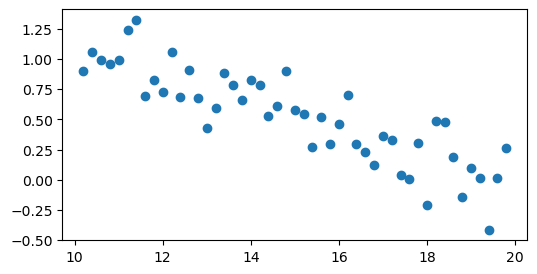

In [53]:
# Set the default figure size from now on 
plt.rcParams['figure.figsize'] = [6, 3]

plt.scatter(x_data, y_data)
plt.show()

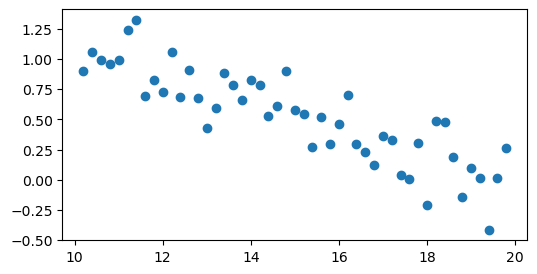

In [54]:
""" Set the default figure size from now on  """
plt.rcParams['figure.figsize'] = [6, 3]

plt.scatter(x_data, y_data)
plt.show()

<h3 style="color:#9865A9"> => Recap: </h3>    
<div style="margin-top: -10px;">

Using a wrong starting model and too few data can lead to <br>
=> `OptimizeWarning: Covariance of the parameters could not be estimated!` <br>
It means that the fit could not determine the uncertainties (variance) of the fitting parameters. 

/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


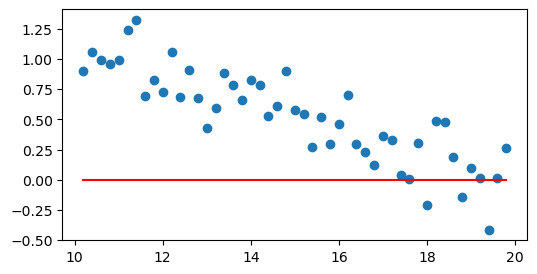

In [55]:
popt, pcov = curve_fit(gauss_f, x_data, y_data, p0=[2000, 790, 60])

### Get params and create the model
A_opt, mu_opt, sig_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 1000)
y_model = gauss_f(x_model, A_opt, mu_opt, sig_opt)

## Plot moel aproximation
plt.scatter(x_data, y_data)
plt.plot(x_model, y_model, color='r')
plt.show()

<h3 style="color:#9865A9"> => One solution: </h3>    
Fix it! Changing initial guess params and set maxfev

[ 0.99019466 10.40233319  5.73030916] [[ 0.00775377 -0.07998976  0.05615225]
 [-0.07998976  1.36574081 -1.16942376]
 [ 0.05615225 -1.16942376  1.15781881]]


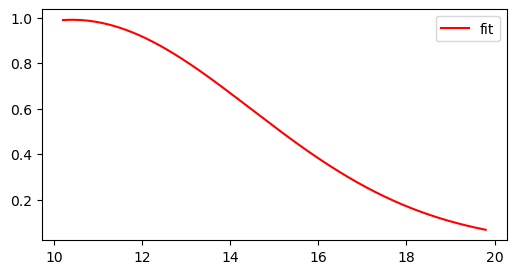

In [56]:
x_fit = x_data[(x_data>10) & (x_data<20)]
y_fit = y_data[(x_data>10) & (x_data<20)]

# Set the initial guess for parameters
p0 = [1, 10, 1]    
# Fit 
popt, pcov = curve_fit(gauss_f, x_fit, y_fit, p0=p0, maxfev=10000)
print(popt, pcov)

##### Plot the fitted model
x_model = np.linspace(min(x_fit), max(x_fit), 1000)
y_model = gauss_f(x_model, *popt)
plt.plot(x_model, y_model, 'r-', label='fit')
plt.legend()
plt.show()

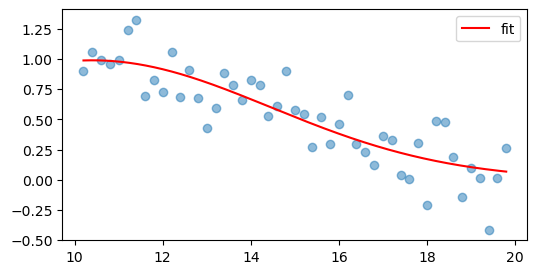

In [57]:
""" Plot together """
plt.plot(x_data, y_data, 'o', alpha=0.5)
plt.plot(x_model, y_model, 'r-', label='fit')
plt.legend()
plt.show()

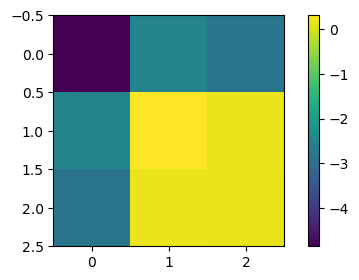

In [58]:
## Covariance matrix 
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

In [59]:
np.sqrt(np.diag(pcov))

array([0.08805551, 1.16864914, 1.07601989])

/tmp/ipykernel_242532/3301816449.py:1: RuntimeWarning: invalid value encountered in sqrt
  yerr_data = np.sqrt(y_data)


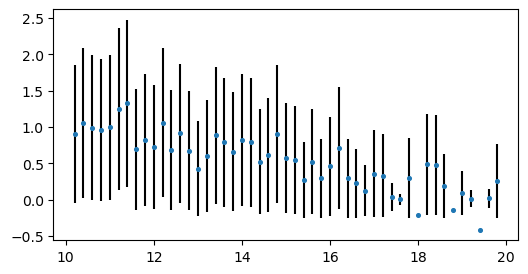

In [60]:
yerr_data = np.sqrt(y_data)
plt.errorbar(x_data, y_data, yerr_data, ls='', color='k')
plt.scatter(x_data, y_data, s=7, zorder=1000)
plt.show()

In [61]:
popt, pcov = curve_fit(gauss_f, x_data, y_data, sigma=yerr_data, p0=[2000, 790, 60])
popt

array([2000.,  790.,   60.])